In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D



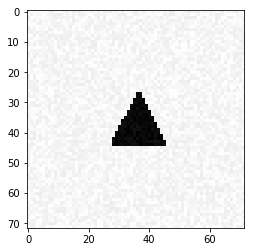

In [2]:


# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

##  3 - Simple Classification

In [3]:
#Data Set Generation
[X_train, Y_train] = generate_dataset_classification(1200, 20)



Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190


In [4]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train, num_classes=3, dtype='float32')


In [23]:
#Classifier using SGD
from keras.optimizers import SGD


nb_neurons = 20
model = Sequential([Dense(nb_neurons, input_dim=5184),
                    Activation('relu'),
                    Dense(3),Activation('softmax')])

sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9,nesterov=True)
model.compile(loss='mean_squared_error',optimizer=sgd)
model.fit(X_train, Y_train, epochs=35, batch_size=32)

Epoch 1/35
1200/1200 [==============================] - 0s 220us/step - loss: 0.2145
Epoch 2/35
1200/1200 [==============================] - 0s 72us/step - loss: 0.1829
Epoch 3/35
1200/1200 [==============================] - 0s 68us/step - loss: 0.1653
Epoch 4/35
1200/1200 [==============================] - 0s 68us/step - loss: 0.1651
Epoch 5/35
1200/1200 [==============================] - 0s 66us/step - loss: 0.1577
Epoch 6/35
1200/1200 [==============================] - 0s 67us/step - loss: 0.1540
Epoch 7/35
1200/1200 [==============================] - 0s 71us/step - loss: 0.1521
Epoch 8/35
1200/1200 [==============================] - 0s 75us/step - loss: 0.1518
Epoch 9/35
1200/1200 [==============================] - 0s 69us/step - loss: 0.1501
Epoch 10/35
1200/1200 [==============================] - 0s 68us/step - loss: 0.1485
Epoch 11/35
1200/1200 [==============================] - 0s 80us/step - loss: 0.1473
Epoch 12/35
1200/1200 [==============================] - 0s 80us/step - l

In [21]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

In [34]:
#Classifier using SGD
from keras.optimizers import SGD


nb_neurons = 20
model = Sequential([Dense(nb_neurons, input_dim=5184),
                    Activation('relu'),
                    Dense(3),Activation('softmax')])

model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train, Y_train, epochs=25, batch_size=32)

Epoch 1/25
1200/1200 [==============================] - 0s 336us/step - loss: 0.2447
Epoch 2/25
1200/1200 [==============================] - 0s 94us/step - loss: 0.2222
Epoch 3/25
1200/1200 [==============================] - 0s 74us/step - loss: 0.2222
Epoch 4/25
1200/1200 [==============================] - 0s 81us/step - loss: 0.2222
Epoch 5/25
1200/1200 [==============================] - 0s 82us/step - loss: 0.2222
Epoch 6/25
1200/1200 [==============================] - 0s 78us/step - loss: 0.2222
Epoch 7/25
1200/1200 [==============================] - 0s 82us/step - loss: 0.2222
Epoch 8/25
1200/1200 [==============================] - 0s 93us/step - loss: 0.2222
Epoch 9/25
1200/1200 [==============================] - 0s 82us/step - loss: 0.2222
Epoch 10/25
1200/1200 [==============================] - 0s 72us/step - loss: 0.2222
Epoch 11/25
1200/1200 [==============================] - 0s 108us/step - loss: 0.2222
Epoch 12/25
1200/1200 [==============================] - 0s 95us/step - 

In [33]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 0., 1.]], dtype=float32)

## 4 - Visualization

In [9]:
model.get_weights()

[array([[ 0.02045762,  0.02902721, -0.01021157, ..., -0.0105318 ,
         -0.02656842, -0.03605124],
        [ 0.02665934, -0.00697651,  0.0182542 , ...,  0.02012807,
          0.02903719,  0.02779045],
        [-0.0243208 ,  0.02217144,  0.00746698, ..., -0.01964334,
         -0.02404301, -0.01208143],
        ...,
        [ 0.02441573, -0.01197249,  0.01156312, ...,  0.0213629 ,
         -0.02139452,  0.02544641],
        [-0.01855743, -0.01320484,  0.01830636, ..., -0.00427855,
          0.02984815,  0.00284007],
        [ 0.02573478, -0.01892029,  0.03143298, ..., -0.02352592,
          0.02397377, -0.01682055]], dtype=float32),
 array([-0.00582428,  0.00244074,  0.00770106, -0.00582694, -0.00582306,
         0.00661929,  0.00581373,  0.        , -0.00281505,  0.00583854,
        -0.00582709, -0.00582709,  0.        ,  0.00577131, -0.00582606,
        -0.00128509, -0.00582691,  0.        ,  0.00033511, -0.0058233 ],
       dtype=float32),
 array([[ 0.40845218,  0.27025786, -0.4507

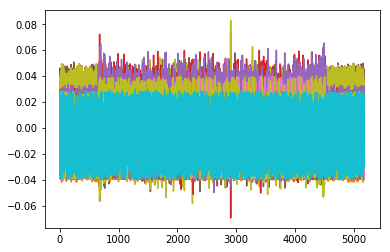

In [31]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

weights = model.get_weights()
plt.plot(weights[0])


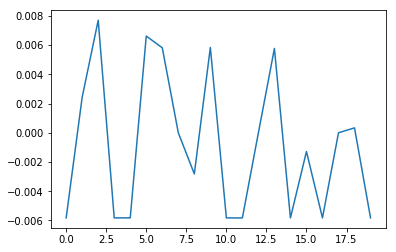

In [11]:
plt.plot(weights[1])

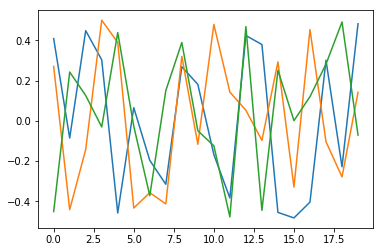

In [12]:
plt.plot(weights[2])

## 5 - A More Difficult Classification Problem
### (1) Add Accuracy

In [24]:
[X_train, Y_train] = generate_dataset_classification(1200, 20, True)
Y_train = np_utils.to_categorical(Y_train, num_classes=3, dtype='float32')

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190


In [14]:
print(Y_train.shape)

(1200, 3)


In [15]:
# Model with Accuracy
nb_neurons = 20
model = Sequential([Dense(nb_neurons, input_dim=5184),
                    Activation('relu'),
                    Dense(3),Activation('softmax')])

sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9,nesterov=True)
model.compile(loss='mean_squared_error',optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1200/1200 [==============================] - 0s 197us/step - loss: 0.4253 - acc: 0.3508
Epoch 2/10
1200/1200 [==============================] - 0s 68us/step - loss: 0.4272 - acc: 0.3592
Epoch 3/10
1200/1200 [==============================] - 0s 65us/step - loss: 0.4272 - acc: 0.3592
Epoch 4/10
1200/1200 [==============================] - 0s 66us/step - loss: 0.4272 - acc: 0.3592
Epoch 5/10
1200/1200 [==============================] - 0s 65us/step - loss: 0.4272 - acc: 0.3592
Epoch 6/10
1200/1200 [==============================] - 0s 66us/step - loss: 0.4272 - acc: 0.3592
Epoch 7/10
1200/1200 [==============================] - 0s 62us/step - loss: 0.4272 - acc: 0.3592
Epoch 8/10
1200/1200 [==============================] - 0s 62us/step - loss: 0.4272 - acc: 0.3592
Epoch 9/10
1200/1200 [==============================] - 0s 63us/step - loss: 0.4272 - acc: 0.3592
Epoch 10/10
1200/1200 [==============================] - 0s 66us/step - loss: 0.4272 - acc: 0.3592


In [16]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 0., 1.]], dtype=float32)

### (2) 2D Convolution Layers Model

In [36]:
#Generate Test Set
[X_test, Y_test] = generate_test_set_classification()


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [37]:
#Reshape X_test for model input
X_test = X_test.reshape(300,72,72,1)
X_test = X_test.astype('float32')

In [39]:
#create model with convolutional layers
model = Sequential()
model.add(Conv2D(64,kernel_size=5, activation='relu', input_shape=(72,72,1)))
model.add(Conv2D(32, kernel_size=5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(X_test, Y_test, epochs=15, batch_size=32)

Epoch 1/15
300/300 [==============================] - 10s 33ms/step - loss: 1.2368 - acc: 0.3800
Epoch 2/15
300/300 [==============================] - 8s 26ms/step - loss: 1.0448 - acc: 0.4867
Epoch 3/15
300/300 [==============================] - 8s 28ms/step - loss: 0.8926 - acc: 0.6467
Epoch 4/15
300/300 [==============================] - 9s 28ms/step - loss: 0.7209 - acc: 0.7000
Epoch 5/15
300/300 [==============================] - 9s 30ms/step - loss: 0.6090 - acc: 0.7467
Epoch 6/15
300/300 [==============================] - 8s 26ms/step - loss: 0.5519 - acc: 0.7933
Epoch 7/15
300/300 [==============================] - 9s 28ms/step - loss: 0.4903 - acc: 0.8133
Epoch 8/15
300/300 [==============================] - 8s 27ms/step - loss: 0.4006 - acc: 0.8567
Epoch 9/15
300/300 [==============================] - 9s 28ms/step - loss: 0.3692 - acc: 0.8600
Epoch 10/15
300/300 [==============================] - 8s 25ms/step - loss: 0.2895 - acc: 0.9100
Epoch 11/15
300/300 [=================

In [ ]:
#Model Evaluation
model.evaluate(X_test, Y_test)

### Comments

Using the Deep Layers we are able to greatly improve our accuracy each epoch. In addtion changing the loss function to "categorical_crossentropy" brings a lot of added value for our type of problem (class). With more epoch and a larger dataset, the accuracy could be improved further, nevertheless the marginal value of such effort is not high enough, 99% is already very high.

## 6 - A Regression Problem


In [68]:
[X_train, Y_train] = generate_dataset_regression(2000, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990


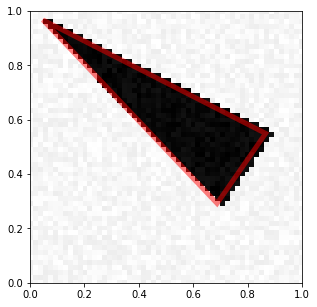

In [70]:
#visualization
visualize_prediction(X_train[0], Y_train[0])

In [82]:
def normalize_vector(array):
    size = array.shape[0]
    normalized_array = np.copy(array)
    
    for k in range(size):
        x1, y1, x2, y2, x3, y3 = array[k, 0], array[k, 1], array[k, 2], array[k, 3], array[k, 4], array[k, 5]
        coordinates = {y1:x1, y2:x2, y3:x3}
        coordinates_list = list(coordinates)
        coordinates_list.sort()
        new_vector = []
        
        for key in coordinates_list:
            new_vector.append(coordinates[key])
            new_vector.append(key)
        
        normalized_array[k] = new_vector
    
    return(normalized_array)

In [84]:
Y_train= normalize_vector(Y_train)


In [85]:
X_train = X_train.reshape(X_train.shape[0], 72, 72, 1) 


In [86]:
def base_model():
    model = Sequential()
    #Block 1
    model.add(Conv2D(32,kernel_size=8, activation='relu', input_shape=X_train.shape[1:]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #Block 2
    model.add(Conv2D(64, kernel_size=7, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #Block 3
    model.add(Conv2D(32, kernel_size=6, activation='relu'))
    model.add(Dropout(0.4))


    #Block 4
    model.add(Flatten())
    model.add(Dense(6, activation='softmax'))
    #Optimizer
    model.compile(optimizer='adam', metrics=['accuracy'],loss = 'mse')
    return model



In [87]:
from keras.wrappers.scikit_learn import KerasRegressor
reg = KerasRegressor(build_fn=base_model, epochs=15, batch_size=32,shuffle =True)
reg.fit(X_train, Y_train)

Epoch 1/15
2000/2000 [==============================] - 19s 10ms/step - loss: 0.1716 - acc: 0.4880
Epoch 2/15
2000/2000 [==============================] - 19s 9ms/step - loss: 0.1575 - acc: 0.6235
Epoch 3/15
2000/2000 [==============================] - 19s 9ms/step - loss: 0.1514 - acc: 0.6990
Epoch 4/15
2000/2000 [==============================] - 18s 9ms/step - loss: 0.1488 - acc: 0.7235
Epoch 5/15
2000/2000 [==============================] - 18s 9ms/step - loss: 0.1464 - acc: 0.7525
Epoch 6/15
2000/2000 [==============================] - 19s 9ms/step - loss: 0.1454 - acc: 0.7725
Epoch 7/15
2000/2000 [==============================] - 18s 9ms/step - loss: 0.1442 - acc: 0.7690
Epoch 8/15
2000/2000 [==============================] - 19s 9ms/step - loss: 0.1435 - acc: 0.7930
Epoch 9/15
2000/2000 [==============================] - 21s 10ms/step - loss: 0.1429 - acc: 0.7940
Epoch 10/15
2000/2000 [==============================] - 21s 10ms/step - loss: 0.1424 - acc: 0.8060
Epoch 11/15
2000

In [88]:
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [89]:
Y_test= normalize_vector(Y_test)


In [90]:
X_test = X_test.reshape(300, 72, 72, 1) 

In [91]:
Y_predict = reg.predict(X_test)

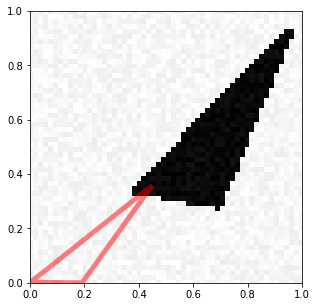

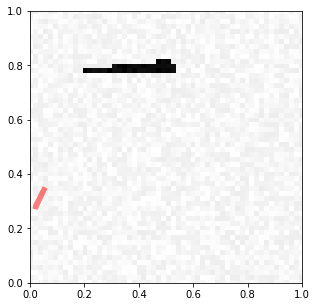

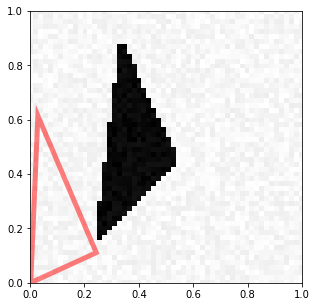

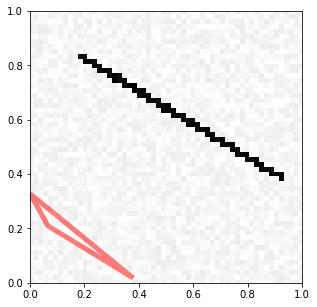

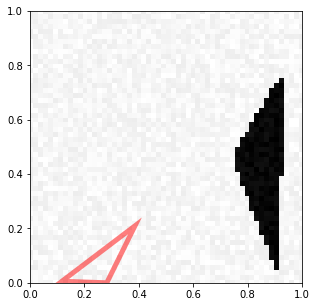

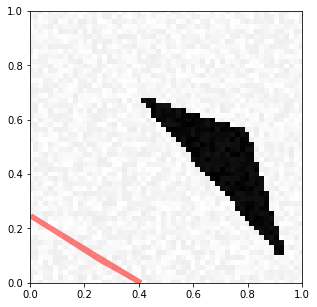

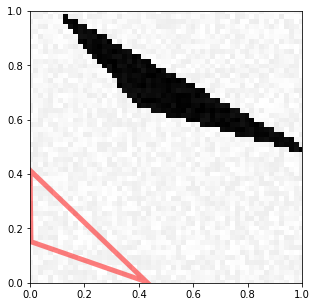

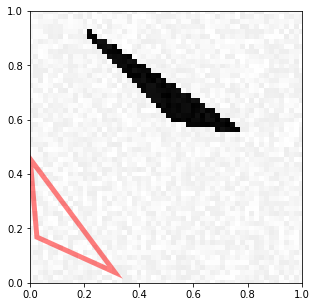

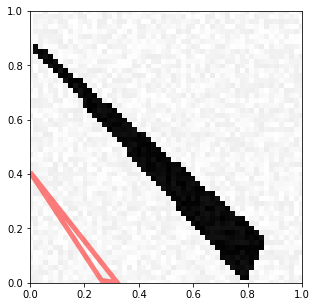

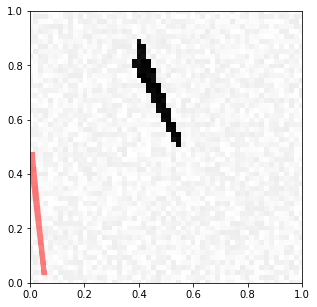

In [92]:
for i in range(10):
    visualize_prediction(X_test[i],Y_predict[i])
    plt.show()

### Comments

The model is not very conclusive. I believe I failed to properly normalize the Y-datasets which is one of the reasons causing the algorithm to fail. I am having trouble to understand why the predicted Y are centered towards the origin. More work need to be done to improve the model. 

## 7 - Image Denoising

In [56]:
def generate_a_disk_bis(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, 0.01),generate_a_drawing(figsize, U, V, 500)

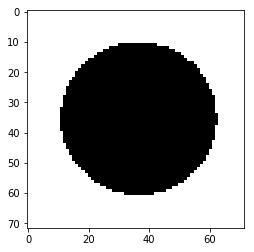

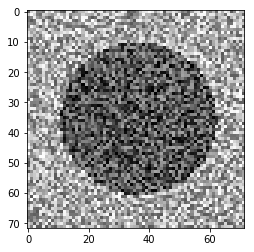

In [64]:
# Visualization of noised and not clear circles
imNoisy, imNormal = generate_a_disk_bis()
plt.imshow(imNoisy.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()
plt.imshow(imNormal.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()